# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form:
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally:

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms.

In [4]:
sample_size = 100 # How many children in data set?
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0.
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa,
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {

                            age = runif(sample_size, age_lo, age_hi)
                            epsilon_x = rnorm(sample_size, 0, sd = sd_x)
                            x = age*beta_xa+ beta_x0 +epsilon_x

                            epsilon_c = rnorm(sample_size, 0, sd = sd_c)
                            c = age*beta_ca + beta_c0 + epsilon_c

                            data.frame(age = age, x = x, c = c)

}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,88.67876,88.62245,61.59114
2,137.71142,41.11548,54.33561
3,145.81199,17.95685,175.84446
4,146.60728,96.01039,192.90304
5,85.14781,117.02513,132.09723
6,179.52370,41.90564,113.48723


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [11]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


a) Plot the relationship between age and reading comprehension.

`geom_smooth()` using formula = 'y ~ x'


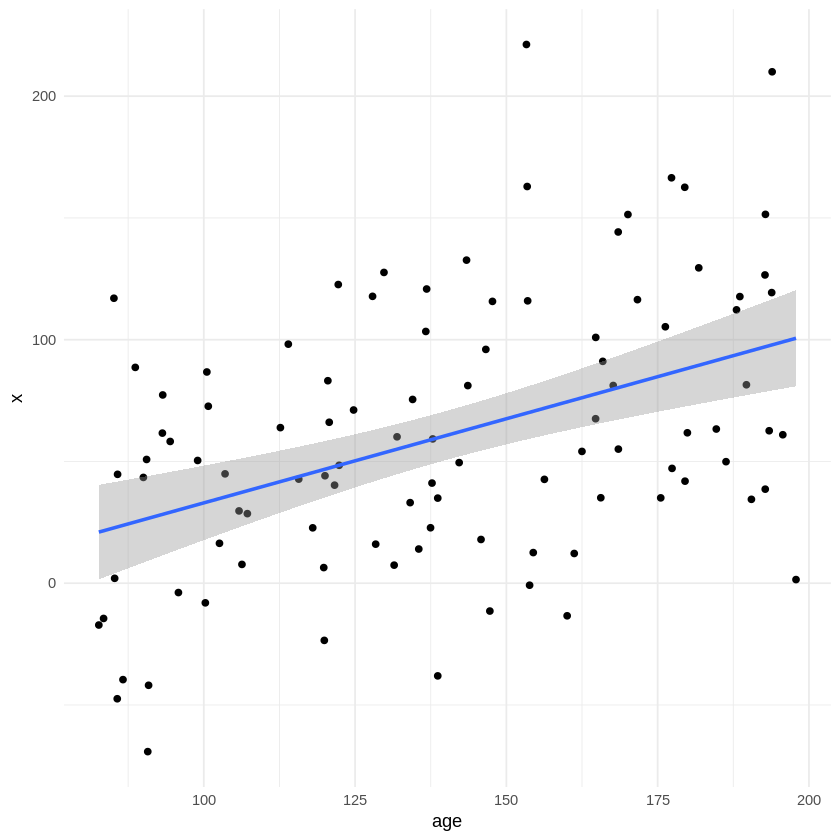

In [5]:
library(ggplot2)
ggplot(dat, aes(x = age, y = x)) +
  geom_point() +
    geom_smooth(method = 'lm') +
      theme_minimal()

b) Plot the relationship between reading experience, age, and reading comprehension.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


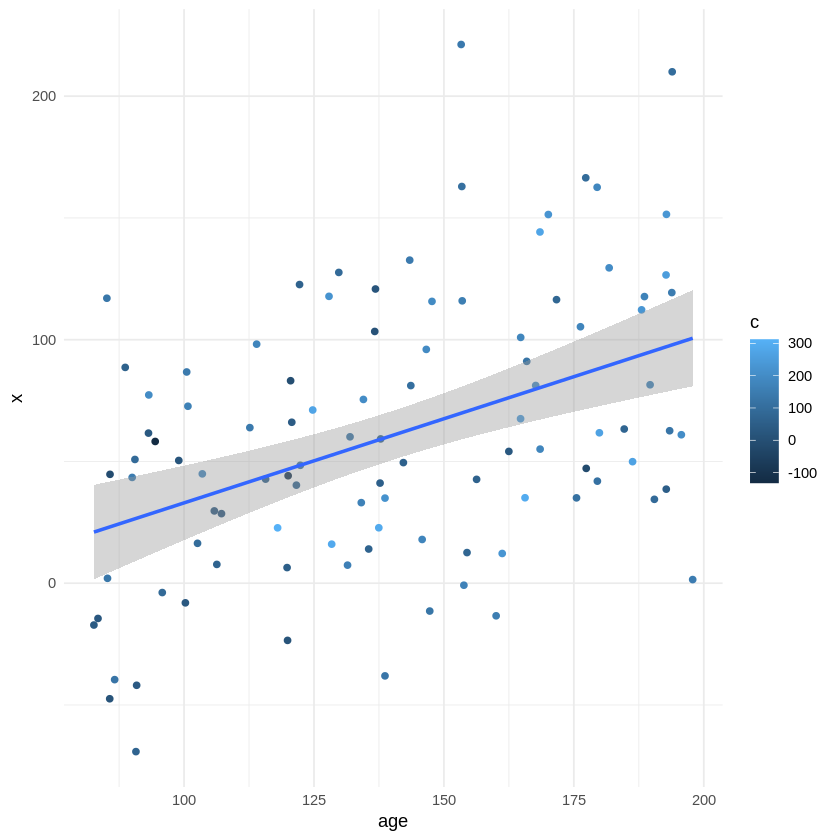

In [6]:
ggplot(dat,aes(x=age,y=x,color=c)) +
  geom_point() +
  geom_smooth(method = lm) +
    theme_minimal()


---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [2]:
install.packages("mediation") # uncomment to install the mediation package.
library(mediation)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘mvtnorm’, ‘sandwich’, ‘lpSolve’, ‘Hmisc’, ‘lme4’


Loading required package: MASS

Loading required package: Matrix

Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [7]:
fitM <- lm(x ~ age, data=dat)
fitY <- lm(c ~ x + age, data=dat)
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat='age', mediator='x')
summary(fitMed)


Call:
lm(formula = x ~ age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.114 -38.139  -1.887  33.526 151.404 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.1209    21.1066  -1.711   0.0902 .  
age           0.6910     0.1468   4.708 8.24e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.75 on 98 degrees of freedom
Multiple R-squared:  0.1845,	Adjusted R-squared:  0.1761 
F-statistic: 22.16 on 1 and 98 DF,  p-value: 8.239e-06



Call:
lm(formula = c ~ x + age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-214.876  -51.179    2.374   52.835  212.200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -9.8006    33.9936  -0.288 0.773728    
x             0.1109     0.1603   0.692 0.490815    
age           0.9094     0.2579   3.526 0.000647 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 80.55 on 97 degrees of freedom
Multiple R-squared:  0.1594,	Adjusted R-squared:  0.1421 
F-statistic: 9.198 on 2 and 97 DF,  p-value: 0.0002199



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME             0.0787      -0.1244         0.30    0.47    
ADE              0.9067       0.4066         1.39  <2e-16 ***
Total Effect     0.9854       0.5525         1.43  <2e-16 ***
Prop. Mediated   0.0759      -0.1329         0.36    0.47    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

> There is a direct significant effect of age on reading comprehension and it is not mediated by word reading experience. This may be beacuse there are other skills involved with reading comprehension that are not addressed.
>

**DUE:** 5pm EST, April 1, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*